# Propagating full field and animating it


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from fiberamp.fiber.microstruct.bragg import plotlogf, plotlogf_real, plotlogf_imag
from scipy.optimize import newton
from scipy.integrate import quad
from IPython.display import Video

import json

plt.style.use('dark_background')
%matplotlib widget

In [2]:
A = SlabExact(scale=1e-6, Ts=[2., 2., 2.], xrefs=[300, 500, 300],
              ns=[1.44, 1, 1.44], wl=1e-6, symmetric=True)


In [3]:
def quadratic_piecewise(x):
    conds = [(x<-.5), ((-.5<=x)*(x<=.5)), (x>.5)]
    funcs = [0, lambda x: .25-x**2, 0]
    return np.piecewise(x, conds, funcs)


In [4]:
# Set input function
f0 = quadratic_piecewise
f0_shifted = lambda x: f0(x) + 1
# Set input field type
field_type = 'TE'

# Propagation of input



In [5]:
Propagator_Class = A.propagator()

In [6]:
paper_method=False

In [7]:
P = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                     LZ=0.001, RZ=10, NZ=100, 
                     field_type=field_type, 
                     sign='+1', paper_method=True)

 98% (98 of 100) |###################### | Elapsed Time: 0:00:00 ETA:   0:00:00

# 1D Plot


In [8]:
xs = np.linspace(-6, 6, 10000)
diff = lambda x: P.slice_propagate(x) - f0(x)

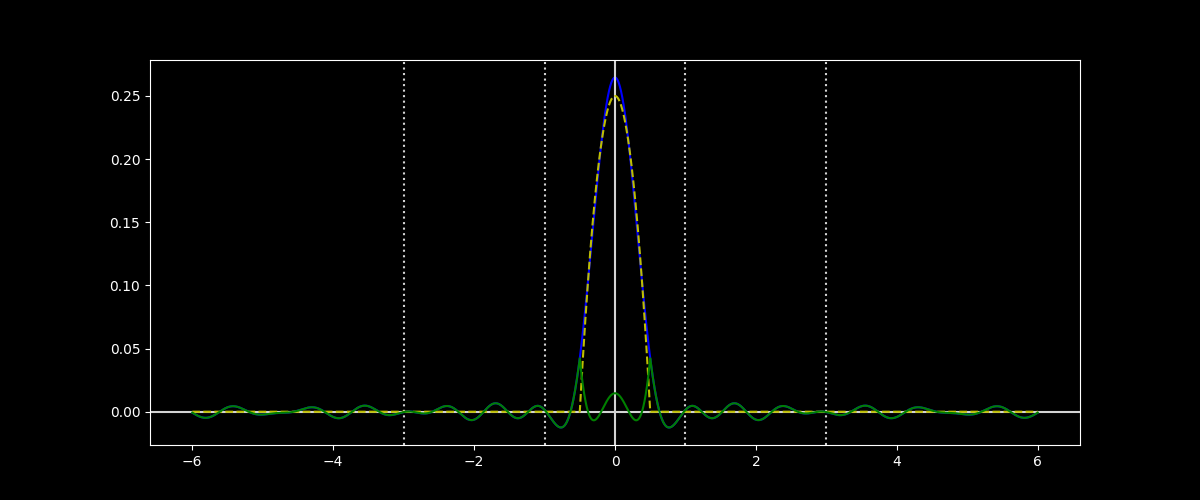

In [9]:
A.plot_field_1d(P.slice_propagate, xs=xs, part='real', color='blue');
A.add_1d_plot(f0, xs=xs, linestyle='--', color='y')
A.add_1d_plot(diff, xs=xs, color='g')

## 2D Plots

In [10]:
xs = np.linspace(-10, 10, 800)

(<Figure size 1000x500 with 2 Axes>, <Axes: >)

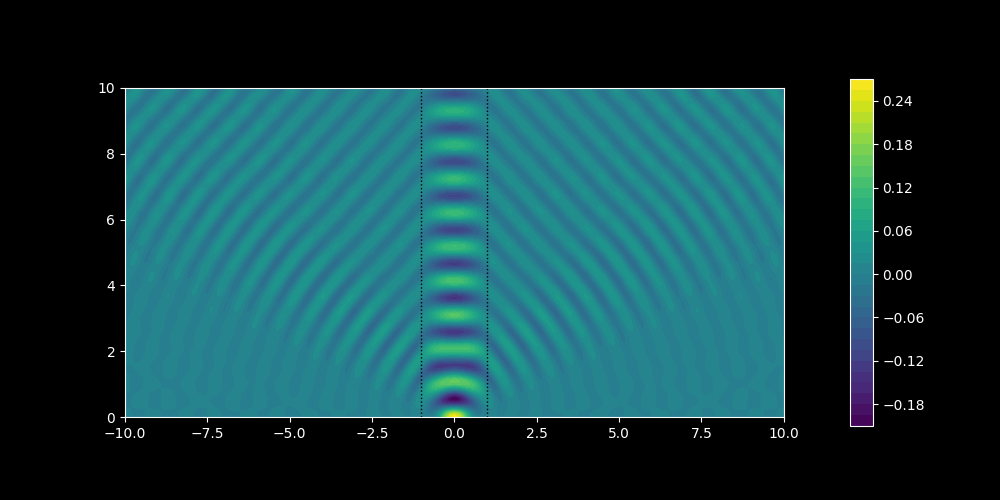

In [11]:
A.plot_field_2d(P.propagate, xs=xs, zmin=0, zmax=10, zref=200, maxdim=10, colorbar=True)


## Animation Attempts

In [12]:
# A.animate_field_1d?

In [13]:
# A.animate_field_1d(P.slice_propagate, 'attempt_1d')

In [14]:
Video('attempt_1d.mp4', html_attributes="controls loop")


In [15]:
# A.animate_field_2d?

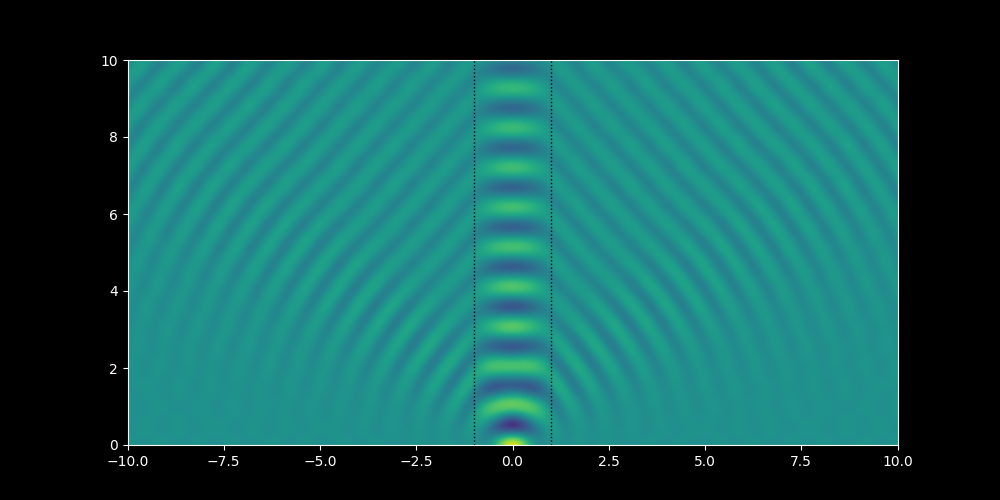

In [16]:
A.animate_field_2d(P.propagate, 'attempt_2d', fps=20, xs=xs, zmin=0, zmax=10, zref=200, 
                   maxdim=10, secs=2, levels=100, color_min=-.3, color_max=.3)

In [17]:
Video('attempt_2d.mp4', html_attributes="controls loop")


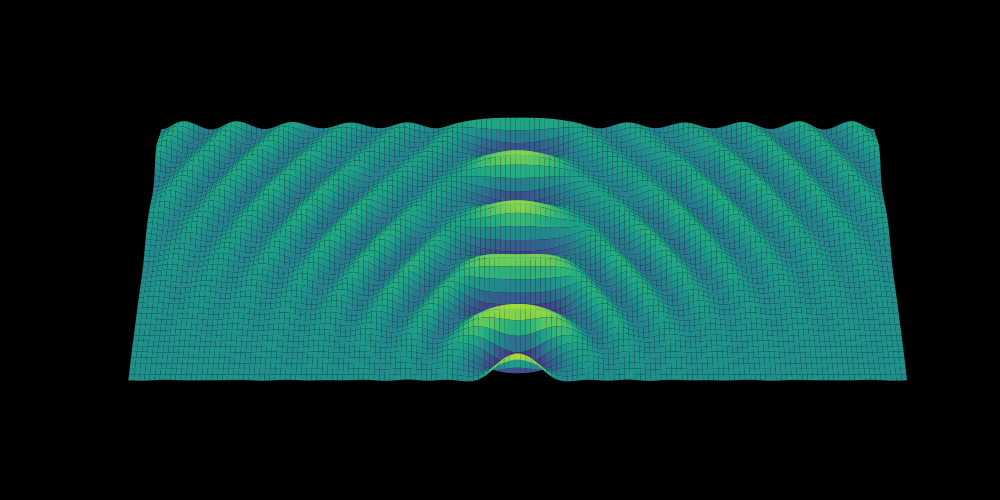

In [22]:
A.animate_field_2d_surface(P.propagate, 'attempt_3d', fps=20, secs=2.5,  xs=np.linspace(-6,6,150), zmin=0, zmax=5, zref=50,
                           rstride=1, cstride=1, part='real', color_min=-.2, color_max=.2)

In [23]:
Video('attempt_3d.mp4', html_attributes="controls loop")


## Set max and min colormap

In [63]:
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=-.1, vmax=.1)

In [79]:
kw = dict( cmap=plt.cm.hsv, vmin=-1, vmax=1, origin='lower')

In [100]:
x = np.linspace(-1,1,100)
X, Y = np.meshgrid(x,x)
Z =2* X + 2*Y

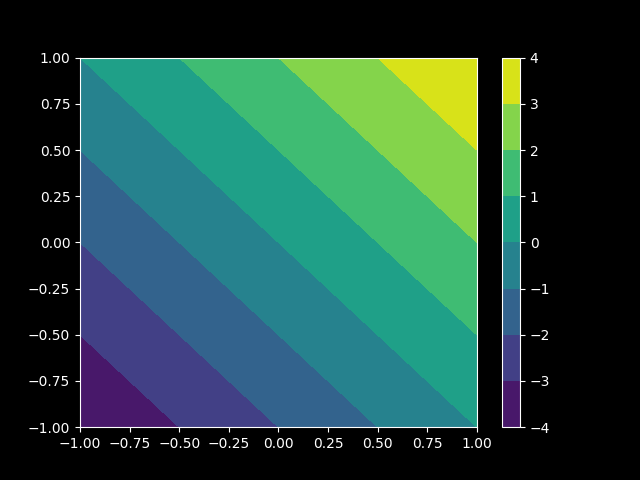

In [101]:
plt.close('all')
plt.contourf(X,Y,Z, cmap='viridis', vmin=None, vmax=None)
plt.colorbar()